# Load all files

In [87]:
import os
import re
import csv

import pandas
import matplotlib.pyplot as plt

In [3]:
rootdir = "./"

In [4]:
problem_dir = {}

In [5]:
problems = ["count","max","min"]
sub_problems = ["light-head-3","light-head-9","heavy-head-3","heavy-head-9"]
strategies = ["no-body","rewrite","replace"]

In [6]:
for problem in problems:
    problem_dir[problem] = {}
    problem_dir[problem]["regex"] = regex = re.compile(f'.*{problem}.*')
    problem_dir[problem]["sub_problems"] = {}
    for sub_problem in sub_problems:
        sub_problem_dir = {}
        sub_problem_dir["regex"] = re.compile(f'.*{sub_problem}.*')
        sub_problem_dir["strategies"] = {}
        
        problem_dir[problem]["sub_problems"][sub_problem] = sub_problem_dir
        
        
        for strategy in strategies:
            strategy_dir = {}
            strategy_dir = {}
            strategy_dir["regex"] = re.compile(f'.*{strategy}.*')
            strategy_dir["file_names"] = []
            
            problem_dir[problem]["sub_problems"][sub_problem]["strategies"][strategy] = strategy_dir
            

In [7]:

for root, dirs, files in os.walk(rootdir):
    for file in files:
        
        for problem in problems:
            if problem in str(file):
                for sub_problem in sub_problems:
                    if sub_problem in str(file):
                        for strategy in strategies:
                            if strategy in str(file):
                                print(f">>{problem}>>{sub_problem}>>{strategy}")
                                print(file)
                                
                                problem_dir[problem]["sub_problems"][sub_problem]["strategies"][strategy]["file_names"].append(str(file))
                                
        



>>count>>light-head-3>>rewrite
05-count-rewrite-light-head-3_grounding_time.csv
>>min>>heavy-head-9>>no-body
20-min-no-body-clique-heavy-head-9_grounding_size.csv
>>min>>heavy-head-3>>no-body
19-min-no-body-clique-heavy-head-3_grounding_time.csv
>>max>>heavy-head-9>>no-body
16-max-no-body-clique-heavy-head-9_grounding_time.csv
>>max>>heavy-head-9>>no-body
16-max-no-body-clique-heavy-head-9_total_time.csv
>>count>>heavy-head-3>>replace
11-count-replace-heavy-head-3_grounding_size.csv
>>max>>heavy-head-3>>no-body
15-max-no-body-clique-heavy-head-3_grounding_size.csv
>>count>>heavy-head-3>>replace
11-count-replace-heavy-head-3_total_time.csv
>>count>>heavy-head-3>>no-body
03-count-no-body-clique-heavy-head-3_grounding_time.csv
>>count>>light-head-9>>rewrite
06-count-rewrite-light-head-9_total_time.csv
>>count>>light-head-9>>replace
10-count-replace-light-head-9_grounding_size.csv
>>count>>light-head-3>>replace
09-count-replace-light-head-3_total_time.csv
>>max>>heavy-head-3>>no-body
15-ma

In [15]:
problem = "count"
sub_problem = "light-head-3"

dir_ = problem_dir[problem]["sub_problems"][sub_problem]

total_time_files = []
grounding_time_files = []
grounding_size_files = []

for strategy in strategies:
    files = dir_["strategies"][strategy]["file_names"]
    
    for file in files:
        if "total_time" in file:
            total_time_files.append((strategy,file))
        elif "grounding_time" in file:
            grounding_time_files.append((strategy,file))
        elif "grounding_size" in file:
            grounding_size_files.append((strategy,file))
        else: 
            assert(False)

# Final plotting code

In [133]:

def plotting_code(files, title_prefix, image_prefix, y_axis_label):
    ds = []

    data_frame_strategy = None
    data_frame = None

    for strategy, file in files:
        data = pandas.read_csv(file, delimiter=',')

        rename_dir = {}
        for col in data.columns:
            if str(col) == "newground-duration":
                rename_dir[col] = f"{strategy.replace('-','_')}"
            if str(col) == "newground-timeout-occured":
                rename_dir[col] = f"{strategy.replace('-','_')}_timeout_occured"
            if str(col) == "gringo-duration":
                rename_dir[col] = f"gringo"
            if str(col) == "idlv-duration":
                rename_dir[col] = f"idlv"
                
            if str(col) == "newground-size":
                rename_dir[col] = f"{strategy.replace('-','_')}"

            if str(col) == "gringo-size":
                rename_dir[col] = f"gringo"
            if str(col) == "idlv-size":
                rename_dir[col] = f"idlv"

            # TODO -> Add different stuff for grounding-size

        data.rename(columns = rename_dir, inplace = True)

        if data_frame is None:
            data_frame_strategy = strategy
            data_frame = pandas.DataFrame(data)
        else:
            data_frame[strategy] = data[strategy]
            data_frame[f"{strategy}_timeout_occured"] = data[f"{strategy}_timeout_occured"]

    # ---- (Why is this red?)
    # Instances to integers (for plotting)
    for instance in data_frame.instance:
        data_frame.loc[data_frame.instance == instance, 'instance'] = int((str(instance).split("_"))[1].split(".")[0])

    x = list(data_frame.instance)
    gringo = list(data_frame.gringo)
    idlv = list(data_frame.idlv)
    no_body = list(data_frame.no_body)
    rewrite = list(data_frame.rewrite)
    replace = list(data_frame["replace"])

    fig, ax = plt.subplots()

    ax.plot(x, gringo, label = "gringo")
    ax.plot(x, idlv, label = "idlv")
    ax.plot(x, no_body, label = "no-body-rewrite")
    ax.plot(x, rewrite, label = "rewrite")
    ax.plot(x, replace, label = "replace")
    ax.set_xlabel("Instance Size")
    ax.set_ylabel(y_axis_label)
    ax.legend()
    ax.set_title(f"{title_prefix} {problem} {sub_problem}")

    fig.savefig(f"images/{image_prefix}_{problem}_{sub_problem}.png", dpi=500)
    plt.show()

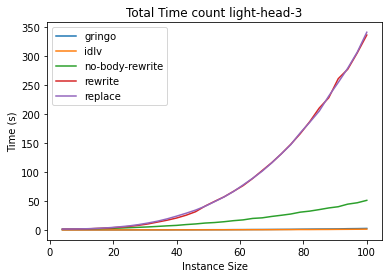

In [134]:
plotting_code(total_time_files, "Total Time", "total_time", "Time (s)")


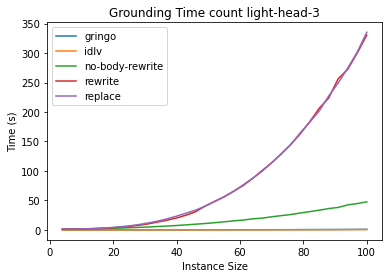

In [135]:
plotting_code(grounding_time_files, "Grounding Time", "grounding_time", "Time (s)")


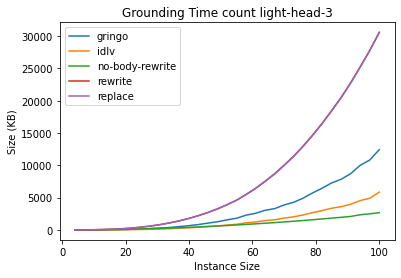

In [136]:
plotting_code(grounding_size_files, "Grounding Time", "grounding_size", "Size (KB)")

In [10]:
# THE FOLLOWING CODE SNIPPET RENAMES 'rewrite-no-body' files to 'no-body'
"""
regex = re.compile('.*-rewrite-no-body-.*')

for root, dirs, files in os.walk(rootdir):
    for file in files:
        
        if regex.match(file):
            splits = str(file).split("rewrite-no-body")
            new_name = f"{splits[0]}no-body{splits[1]}"

            os.rename(str(file),new_name)
"""

'\nregex = re.compile(\'.*-rewrite-no-body-.*\')\n\nfor root, dirs, files in os.walk(rootdir):\n    for file in files:\n        \n        if regex.match(file):\n            splits = str(file).split("rewrite-no-body")\n            new_name = f"{splits[0]}no-body{splits[1]}"\n\n            os.rename(str(file),new_name)\n'